# Final Project Correlations

**Alex Thompson and Bangzhao Shu**

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [2]:
SM_data = {
    '2022-08': 177,
    '2022-07': 173,
    '2022-12': 157,
    '2022-11': 154,
    '2022-01': 151,
    '2022-06': 140,
    '2022-03': 139,
    '2021-07': 138,
    '2022-05': 130,
    '2019-07': 129,
    '2021-08': 126,
    '2022-04': 125,
    '2021-10': 121,
    '2022-10': 119,
    '2019-06': 119,
    '2021-01': 116,
    '2022-09': 115,
    '2021-09': 113,
    '2021-12': 109,
    '2021-06': 109,
    '2020-12': 109,
    '2019-03': 107,
    '2020-07': 106,
    '2021-11': 104,
    '2020-10': 94,
    '2022-02': 91,
    '2021-05': 90,
    '2020-02': 90,
    '2021-03': 87,
    '2020-01': 86,
    '2020-09': 84,
    '2021-02': 81,
    '2020-05': 79,
    '2018-05': 79,
    '2020-11': 78,
    '2019-08': 78,
    '2019-10': 78,
    '2020-06': 77,
    '2019-12': 75,
    '2019-09': 75,
    '2019-04': 75,
    '2019-02': 72,
    '2021-04': 70,
    '2020-04': 69,
    '2020-08': 68,
    '2018-08': 68,
    '2019-01': 68,
    '2018-07': 64,
    '2018-04': 64,
    '2019-11': 63,
    '2018-09': 61,
    '2018-12': 61,
    '2018-03': 61,
    '2018-01': 60,
    '2018-06': 58,
    '2020-03': 57,
    '2018-10': 54,
    '2018-02': 53,
    '2018-11': 47,
    '2019-05': 9
}


SM_df = pd.DataFrame(list(SM_data.items()), columns=['Date', 'Value'])
SM_df[['Year', 'Month']] = SM_df['Date'].str.split('-', expand=True)
SM_df = SM_df.drop('Date', axis=1)
SM_df = SM_df.rename(columns={'Value': 'Num of Env. Comments'})
SM_df.head()

,Num of Env. Comments,Year,Month
0,177,2022,08
1,173,2022,07
2,157,2022,12
3,154,2022,11
4,151,2022,01


In [3]:
microcystins = pd.read_csv('microcystin_monthly_mean.csv')
microcystins.head()

,Year,Month,Total Microcystins (µg/L)
0,2018,5,0.105184
1,2018,6,0.302732
2,2018,7,0.553370
3,2018,8,1.749512
4,2018,9,0.320435


In [4]:
algal = pd.read_csv('algal_monthly_mean.csv')
algal.head()

,Year,Month,Algal Biomass
0,2018,5,2.577500
1,2018,6,3.818684
2,2018,7,7.290917
3,2018,8,9.185897
4,2018,9,6.810222


In [5]:
nutrient = pd.read_csv('TNTP_monthly_mean.csv')
nutrient.head()

,Year,Month,TN:TP (molar)
0,2018,5,110.399500
1,2018,6,108.648296
2,2018,7,82.483920
3,2018,8,61.762968
4,2018,9,40.840154


In [6]:
SM_df['Year'] = SM_df['Year'].astype(int)
SM_df['Month'] = SM_df['Month'].astype(int)  

microcystins['Year'] = microcystins['Year'].astype(int)
microcystins['Month'] = microcystins['Month'].astype(int)

algal['Year'] = algal['Year'].astype(int)
algal['Month'] = algal['Month'].astype(int)

nutrient['Year'] = nutrient['Year'].astype(int)
nutrient['Month'] = nutrient['Month'].astype(int)

In [7]:
merged_df = pd.merge(SM_df, microcystins, on=['Year', 'Month'])
merged_df = pd.merge(merged_df, algal, on=['Year', 'Month'])
merged_df = pd.merge(merged_df, nutrient, on=['Year', 'Month'])

In [8]:
merged_df

,Num of Env. Comments,Year,Month,Total Microcystins (µg/L),Algal Biomass,TN:TP (molar)
0,177,2022,8,0.665172,9.096724,68.793333
1,173,2022,7,0.420868,5.050862,121.221111
2,140,2022,6,0.140724,3.562727,187.617789
3,130,2022,5,0.141852,4.825000,111.476444
4,129,2019,7,0.263404,7.296638,186.896490
5,119,2022,10,0.138796,5.141250,30.887500
6,119,2019,6,0.740029,8.914881,135.299543
7,115,2022,9,0.285018,7.018250,41.705389
8,109,2021,6,0.145732,2.736471,164.453000
9,106,2020,7,0.169291,4.208587,133.287864


In [9]:
merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(day=1))
df = merged_df.sort_values(by='Date')
df = df[df['Date'] != '2019-05-01']

In [10]:
df

,Num of Env. Comments,Year,Month,Total Microcystins (µg/L),Algal Biomass,TN:TP (molar),Date
12,79,2018,5,0.105184,2.577500,110.399500,2018-05-01
21,58,2018,6,0.302732,3.818684,108.648296,2018-06-01
19,64,2018,7,0.553370,7.290917,82.483920,2018-07-01
18,68,2018,8,1.749512,9.185897,61.762968,2018-08-01
20,61,2018,9,0.320435,6.810222,40.840154,2018-09-01
22,54,2018,10,0.070000,3.957368,39.945933,2018-10-01
6,119,2019,6,0.740029,8.914881,135.299543,2019-06-01
4,129,2019,7,0.263404,7.296638,186.896490,2019-07-01
13,78,2019,8,1.647028,13.931875,72.004367,2019-08-01
16,75,2019,9,0.403902,13.769268,39.222563,2019-09-01


## Correlations

### Monthly Correlations

In [11]:
monthly_corr = df.drop({'Year', 'Date'}, axis=1)

In [12]:
monthly_correlations = monthly_corr.groupby('Month').corr()
monthly_correlations

Num of Env. Comments  \
Month                                                   
5     Num of Env. Comments                   1.000000   
      Total Microcystins (µg/L)              1.000000   
      Algal Biomass                          1.000000   
      TN:TP (molar)                          1.000000   
6     Num of Env. Comments                   1.000000   
      Total Microcystins (µg/L)              0.153341   
      Algal Biomass                          0.322290   
      TN:TP (molar)                          0.886121   
7     Num of Env. Comments                   1.000000   
      Total Microcystins (µg/L)             -0.253241   
      Algal Biomass                         -0.400614   
      TN:TP (molar)                          0.453662   
8     Num of Env. Comments                   1.000000   
      Total Microcystins (µg/L)             -0.753962   
      Algal Biomass                         -0.488580   
      TN:TP (molar)                          0.456354   
9     Num of Env. Comments                   1.000000   
      Total Microcystins (µg/L)             -0.499511   
      Algal Biomass                         -0.242182   
      TN:TP (molar)                          0.267192   
10    Num of Env. Comments                   1.000000   
      Total Microcystins (µg/L)             -0.049844   
      Algal Biomass                          0.046221   
      TN:TP (molar)                         -0.473403   

                                 Total Microcystins (µg/L)  Algal Biomass  \
Month                                                                       
5     Num of Env. Comments                        1.000000       1.000000   
      Total Microcystins (µg/L)                   1.000000       1.000000   
      Algal Biomass                               1.000000       1.000000   
      TN:TP (molar)                               1.000000       1.000000   
6     Num of Env. Comments                        0.153341       0.322290   
      Total Microcystins (µg/L)                   1.000000       0.982832   
      Algal Biomass                               0.982832       1.000000   
      TN:TP (molar)                              -0.284854      -0.123846   
7     Num of Env. Comments                       -0.253241      -0.400614   
      Total Microcystins (µg/L)                   1.000000       0.506834   
      Algal Biomass                               0.506834       1.000000   
      TN:TP (molar)                              -0.719738       0.073694   
8     Num of Env. Comments                       -0.753962      -0.488580   
      Total Microcystins (µg/L)                   1.000000       0.320806   
      Algal Biomass                               0.320806       1.000000   
      TN:TP (molar)                               0.161643       0.109274   
9     Num of Env. Comments                       -0.499511      -0.242182   
      Total Microcystins (µg/L)                   1.000000       0.897136   
      Algal Biomass                               0.897136       1.000000   
      TN:TP (molar)                              -0.747969      -0.457377   
10    Num of Env. Comments                       -0.049844       0.046221   
      Total Microcystins (µg/L)                   1.000000       0.881630   
      Algal Biomass                               0.881630       1.000000   
      TN:TP (molar)                               0.903259       0.751831   

                                 TN:TP (molar)  
Month                                           
5     Num of Env. Comments            1.000000  
      Total Microcystins (µg/L)       1.000000  
      Algal Biomass                   1.000000  
      TN:TP (molar)                   1.000000  
6     Num of Env. Comments            0.886121  
      Total Microcystins (µg/L)      -0.284854  
      Algal Biomass                  -0.123846  
      TN:TP (molar)                   1.000000  
7     Num of Env. Comments            0.453662  
      To

### Yearly Correlations

In [13]:
yearly_corr = df.drop({'Month', 'Date'}, axis=1)

In [14]:
yearly_correlations = yearly_corr.groupby('Year').corr()
yearly_correlations

Num of Env. Comments  \
Year                                                   
2018 Num of Env. Comments                   1.000000   
     Total Microcystins (µg/L)              0.184673   
     Algal Biomass                         -0.067377   
     TN:TP (molar)                          0.524536   
2019 Num of Env. Comments                   1.000000   
     Total Microcystins (µg/L)             -0.360438   
     Algal Biomass                         -0.597984   
     TN:TP (molar)                          0.974028   
2020 Num of Env. Comments                   1.000000   
     Total Microcystins (µg/L)             -0.660973   
     Algal Biomass                         -0.542730   
     TN:TP (molar)                          0.323596   
2021 Num of Env. Comments                        NaN   
     Total Microcystins (µg/L)                   NaN   
     Algal Biomass                               NaN   
     TN:TP (molar)                               NaN   
2022 Num of Env. Comments                   1.000000   
     Total Microcystins (µg/L)              0.804973   
     Algal Biomass                          0.344227   
     TN:TP (molar)                          0.309384   

                                Total Microcystins (µg/L)  Algal Biomass  \
Year                                                                       
2018 Num of Env. Comments                        0.184673      -0.067377   
     Total Microcystins (µg/L)                   1.000000       0.828390   
     Algal Biomass                               0.828390       1.000000   
     TN:TP (molar)                              -0.155374      -0.462004   
2019 Num of Env. Comments                       -0.360438      -0.597984   
     Total Microcystins (µg/L)                   1.000000       0.574858   
     Algal Biomass                               0.574858       1.000000   
     TN:TP (molar)                              -0.274170      -0.595751   
2020 Num of Env. Comments                       -0.660973      -0.542730   
     Total Microcystins (µg/L)                   1.000000       0.910752   
     Algal Biomass                               0.910752       1.000000   
     TN:TP (molar)                              -0.425174      -0.549594   
2021 Num of Env. Comments                             NaN            NaN   
     Total Microcystins (µg/L)                        NaN            NaN   
     Algal Biomass                                    NaN            NaN   
     TN:TP (molar)                                    NaN            NaN   
2022 Num of Env. Comments                        0.804973       0.344227   
     Total Microcystins (µg/L)                   1.000000       0.822192   
     Algal Biomass                               0.822192       1.000000   
     TN:TP (molar)                              -0.203531      -0.611834   

                                TN:TP (molar)  
Year                                           
2018 Num of Env. Comments            0.524536  
     Total Microcystins (µg/L)      -0.155374  
     Algal Biomass                  -0.462004  
     TN:TP (molar)                   1.000000  
2019 Num of Env. Comments            0.974028  
     Total Microcystins (µg/L)      -0.274170  
     Algal Biomass                  -0.595751  
     TN:TP (molar)                   1.000000  
2020 Num of Env. Comments            0.323596  
     Total Microcystins (µg/L)      -0.425174  
     Algal Biomass                  -0.549594  
     TN:TP (molar)                   1.000000  
2021 Num of Env. Comments                 NaN  
     Total Microcystins (µg/L)            NaN  
     Algal Biomass                        NaN  
     TN:TP (molar)                        NaN  
2022 Num of Env. Comments            0.309384  
     Total Microcystins (µg/L)      -0.203531  
     Algal Biomass                  -0.611834  
     TN:TP (molar)                   1.000000

### General Correlation

In [15]:
general_correlation = df.drop(['Year', 'Month', 'Date'], axis=1)
general_correlation_matrix = general_correlation.corr()
general_correlation_matrix

,Num of Env. Comments,Total Microcystins (µg/L),Algal Biomass,TN:TP (molar)
Num of Env. Comments,1.000000,-0.174730,-0.125447,0.415995
Total Microcystins (µg/L),-0.174730,1.000000,0.718399,-0.219995
Algal Biomass,-0.125447,0.718399,1.000000,-0.397829
TN:TP (molar),0.415995,-0.219995,-0.397829,1.000000


### Lagged Analysis Correlation

In [16]:
df['Total Microcystins Lag1'] = df.groupby('Year')['Total Microcystins (µg/L)'].shift(-1)
df['Total Microcystins Lag2'] = df.groupby('Year')['Total Microcystins (µg/L)'].shift(-2)
df['Total Microcystins Lag3'] = df.groupby('Year')['Total Microcystins (µg/L)'].shift(-3)

lagged_correlation_matrix = df[['Num of Env. Comments', 'Total Microcystins Lag1', 'Total Microcystins Lag2', 'Total Microcystins Lag3']].corr()
lagged_correlation_matrix

,Num of Env. Comments,Total Microcystins Lag1,Total Microcystins Lag2,Total Microcystins Lag3
Num of Env. Comments,1.000000,0.022626,-0.218227,-0.193866
Total Microcystins Lag1,0.022626,1.000000,-0.203537,-0.367951
Total Microcystins Lag2,-0.218227,-0.203537,1.000000,-0.038528
Total Microcystins Lag3,-0.193866,-0.367951,-0.038528,1.000000


## Correlation VIsualizations

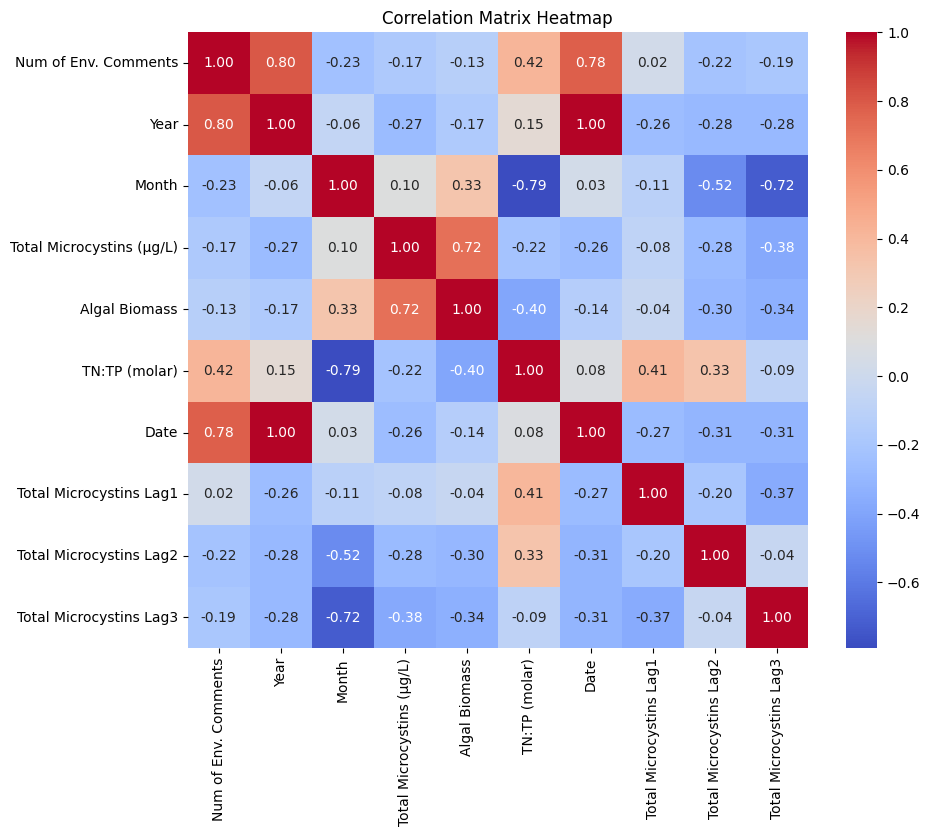

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

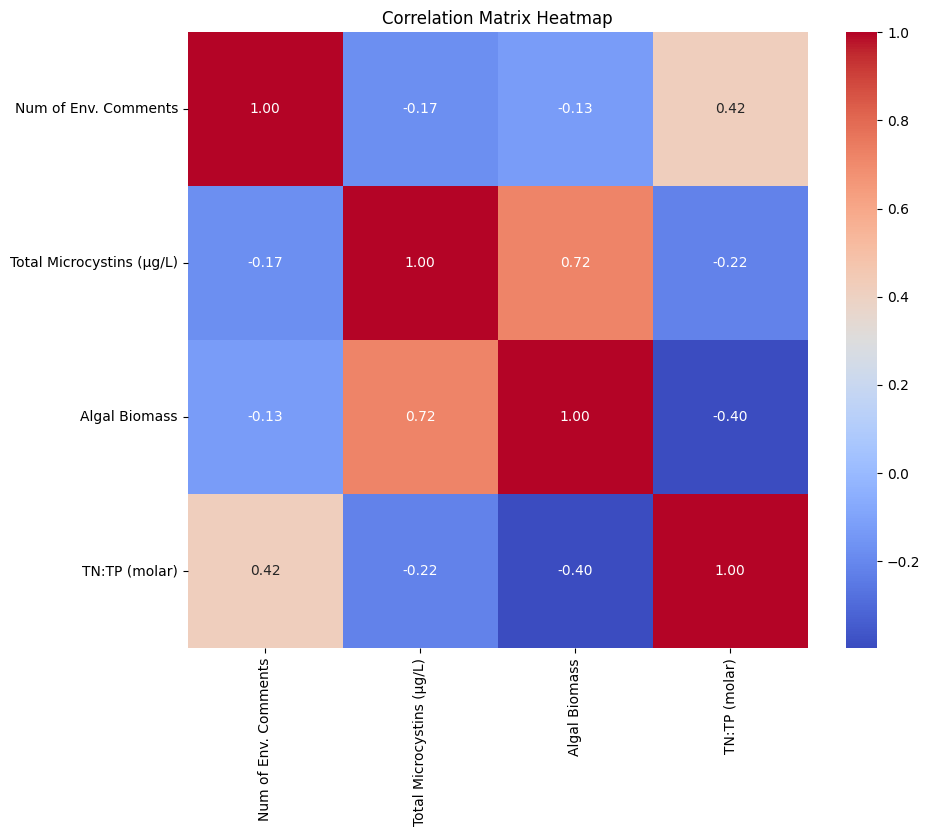

In [18]:
plt.figure(figsize=(10, 8))  
sns.heatmap(general_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()